# **SVM Kernels Indepth Intuition ANd Practical Explanation**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [3]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [4]:
# Generate data
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [5]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

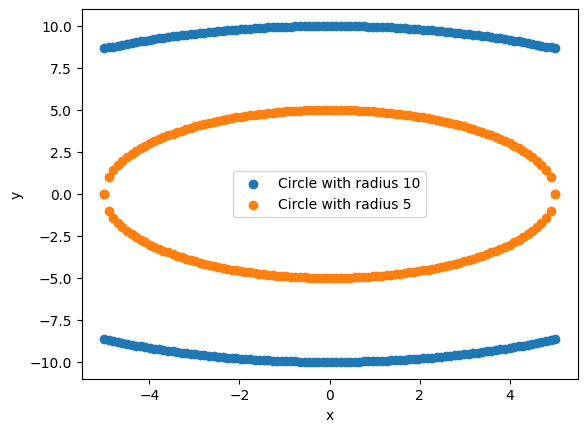

In [6]:
# Plotting the data
plt.scatter(x, y, label='Circle with radius 10')
plt.scatter(x1, y1, label='Circle with radius 5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Creating DataFrames
df1 = pd.DataFrame(np.vstack([x, y]).T, columns=['x1', 'x2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([x1, y1]).T, columns=['x1', 'x2'])
df2['Y'] = 1

In [9]:
# Concatenate DataFrames
df = pd.concat([df1, df2], ignore_index=True)
print(df.head(5))

        x1        x2  Y
0 -5.00000  8.660254  0
1 -4.89899  8.717792  0
2 -4.79798  8.773790  0
3 -4.69697  8.828277  0
4 -4.59596  8.881281  0


In [10]:
# Independent and Dependent feature 
X= df.iloc[:,:2]
y = df.Y

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [12]:
## we need to find components for the Polynomial kernel
## X1,X2,X!_square,X1*X2
df['X1_Square'] = df['x1']**2
df['X2_Square'] = df['x2']**2
df['X1*X2'] = (df['x1'] * df['x2'])
df.head()

,x1,x2,Y,X1_Square,X2_Square,X1*X2
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009


In [13]:
# Independent and Dependent feature 
X= df[['x1','x2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state= 0)

In [16]:
import plotly.express as px

fig = px.scatter_3d(df,x='x1',y='x2',z='X1*X2',color='Y')
fig.show()

In [17]:
import plotly.express as px
fig = px.scatter_3d(df,x='X1_Square',y='X2_Square',z='X1*X2',color='Y')
fig.show()

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='poly')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

---